In [15]:
import pandas as pd
import os
import sys
import numpy as np
import sqlalchemy
import pymysql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# 从MySQL读取 表格信息

In [4]:
host='114.116.48.59'
port=3306
user='nico'
password='cj2441962996.'
database='NicoDB'
table_name='test_2'
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')
connection = engine.connect()
data = pd.read_sql_table(con=connection,table_name=table_name)

# 做数据分析

In [24]:
data.head(1)

,id,link,name,price,shop_name,append,bad,count,good,images,...,省力方便,过滤效果佳,口碑很好,即插即用,客厅适用,安装服务好,安装快速,振动柔和,能效节能,一物多用
0,100019386660,https://item.jd.com/100019386660.html#comment,（GREE）1.5匹 云佳 新一级能效 变频冷暖 自清洁 壁挂式空调挂机KFR-35GW/N...,3199.00,格力京东自营旗舰店,26000,7100,1000000,720000,500,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# 发现数据有一点问题 price里居然有一个字符串叫price
def price_prase(item:str):
    if item == 'price':
        return 0
    else:
        return float(item)
def count_parse(item:str):
    if item:
        return int(item)
    else:
        return 0
        

In [73]:
data['price'] = data['price'].apply(price_prase)

In [74]:
data['count'] = data['count'].apply(append_parse)

In [75]:
processed_data = data.sort_values(by='price')

## 首先观察总评价数量与价格的关系

In [88]:
price = processed_data['price']
count = processed_data['count']

In [95]:
processed_data

,id,link,name,price,shop_name,append,bad,count,good,images,...,省力方便,过滤效果佳,口碑很好,即插即用,客厅适用,安装服务好,安装快速,振动柔和,能效节能,一物多用
120,id,link,name,0.0,shop_name,0,,0,,,...,0,0,0,0,0,0,0,0,0,0
319,100018834988,https://item.jd.com/100018834988.html#comment,（GREE）7叶柔和大风量电风扇/家用低噪落地扇电扇台扇/高颜值节能风扇 （FS-3015h7）,126.0,格力·TOSOT生活电器京东自营旗舰店,0,,0,,,...,0,0,0,0,0,0,0,0,0,0
402,100018834988,https://item.jd.com/100018834988.html#comment,（GREE）7叶柔和大风量电风扇/家用低噪落地扇电扇台扇/高颜值节能风扇 （FS-3015h7）,126.0,格力·TOSOT生活电器京东自营旗舰店,0,,0,,,...,0,0,0,0,0,0,0,0,0,0
366,100018834988,https://item.jd.com/100018834988.html#comment,（GREE）7叶柔和大风量电风扇/家用低噪落地扇电扇台扇/高颜值节能风扇 （FS-3015h7）,126.0,格力·TOSOT生活电器京东自营旗舰店,0,,0,,,...,0,0,0,0,0,0,0,0,0,0
27,100018834988,https://item.jd.com/100018834988.html#comment,（GREE）7叶柔和大风量电风扇/家用低噪落地扇电扇台扇/高颜值节能风扇 （FS-3015h7）,129.0,格力·TOSOT生活电器京东自营旗舰店,2500,2900,1000000,180000,500,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,100021510646,https://item.jd.com/100021510646.html#comment,（GREE）3匹 京淳 高效除甲醛 空调空气净化器一体机 客厅空调立式空调柜机KFR-72L...,11399.0,格力京东自营旗舰店,0,,0,,,...,0,0,0,0,0,0,0,0,0,0
328,10053010235096,https://item.jd.com/10053010235096.html#comment,京淳变频冷暖3匹1级能效柜机除甲醛空调 KFR-72LW/NhDj1BGj(碧玺蓝),11399.0,格力董明珠店,0,,0,,,...,0,0,0,0,0,0,0,0,0,0
118,100020575594,https://item.jd.com/100020575594.html#comment,（GREE）3匹 云铂 紫外线除菌 新1级 自清洁 智能 客厅空调立式空调柜机KFR-72L...,11399.0,格力京东自营旗舰店,0,,0,,,...,0,0,0,0,0,0,0,0,0,0
28,100021569442,https://item.jd.com/100021569442.html#comment,（GREE）新1级能效 空调套装 (大1匹云恬+大1匹云佳+1.5匹云佳+3匹云逸）,16995.0,格力京东自营旗舰店,13000,3900,500000,360000,500,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='price', ylabel='count'>

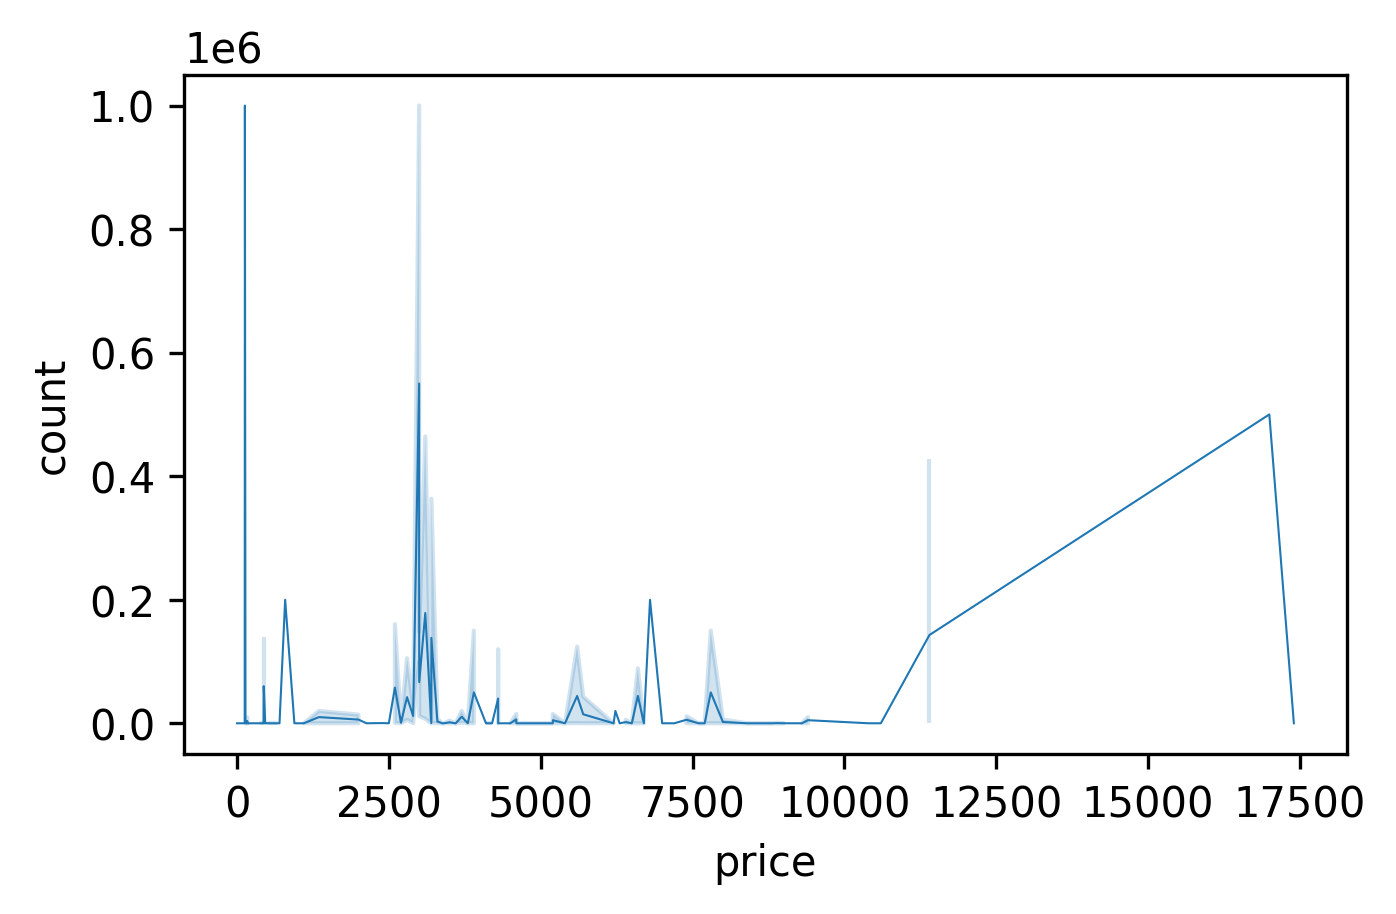

In [86]:
plt.figure(figsize=(5,3),dpi=300)
sns.lineplot(data=processed_data,x='price',y='count',linewidth=0.5)